## Why Did I Choose ICA for `new_arrayA` and PCA for `new_arrayB`?

At first step, I **did not know** which method would work better for two different dataset. So, I decided to try both of them on my dataset and see the results.  

- When I applied **ICA to `new_arrayA`**, the output looked **good**, meaning that the dataset had independent signals that ICA could separate them well. The same result also gained when I tryed PCA as well.
- When I implemented **PCA to `new_arrayB`**, the result was **not good** and the extracted components were not meaningful. This suggested that the dataset did not have strong patterns based on variance.To fix this, I switched the methods.

### **Final Conclusion**
**ICA works well on `new_arrayA`** because the dataset contains **independent sources** that ICA can separate.  
**PCA performed badly on `new_arrayB`** because the data does not have clear variance-driven patterns.  


# Apply ICA on new_arrayA and PCA on new_arrayB

/opt/anaconda3/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


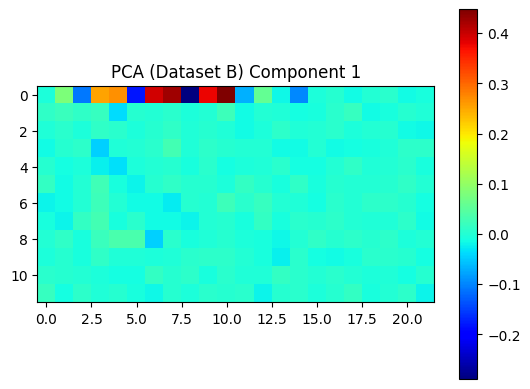

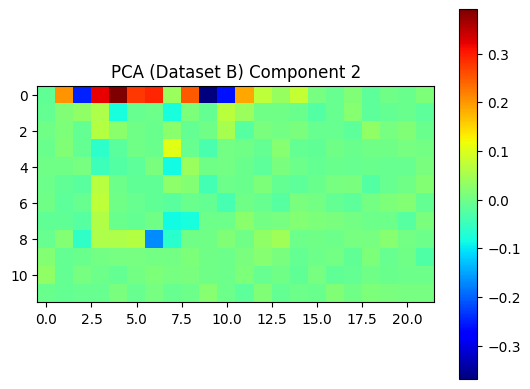

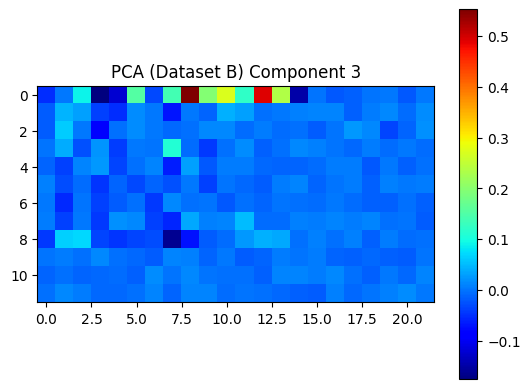

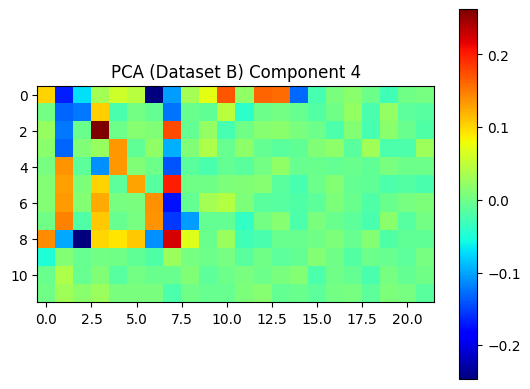

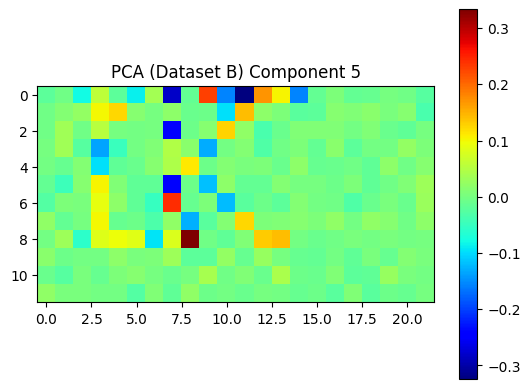

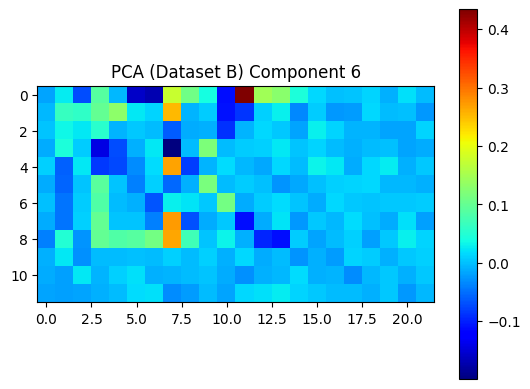

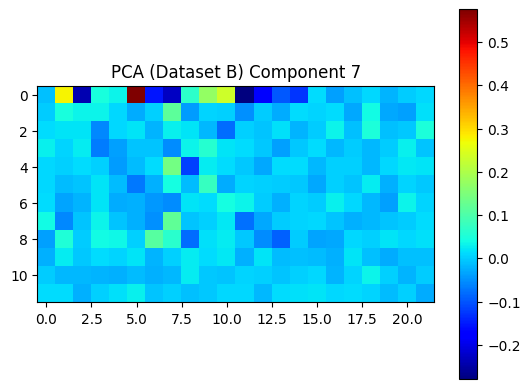

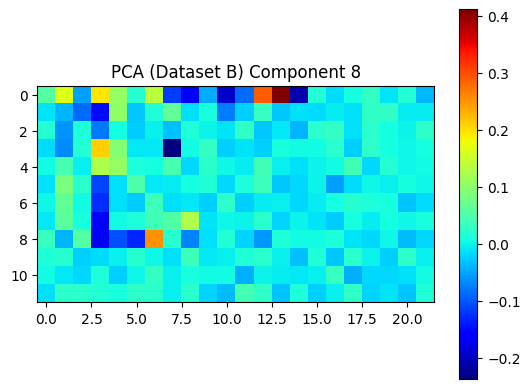

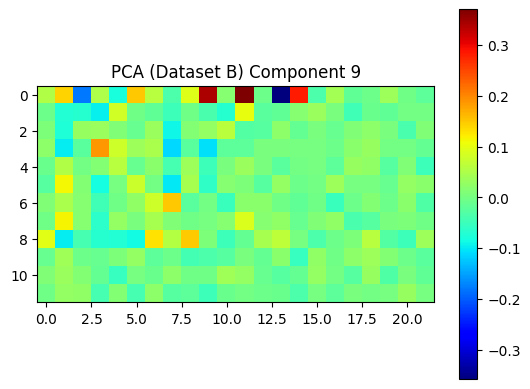

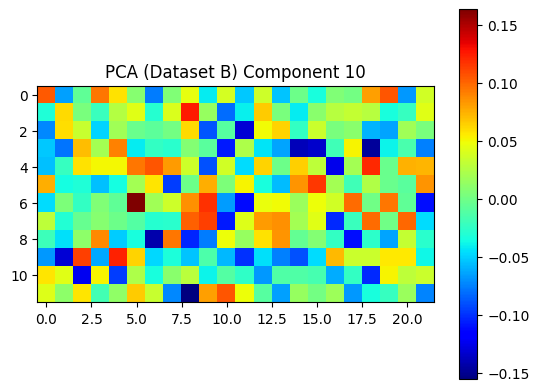

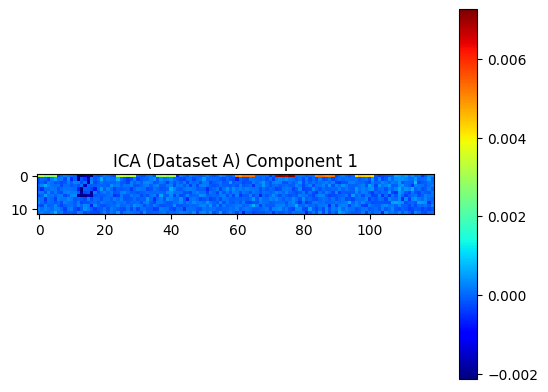

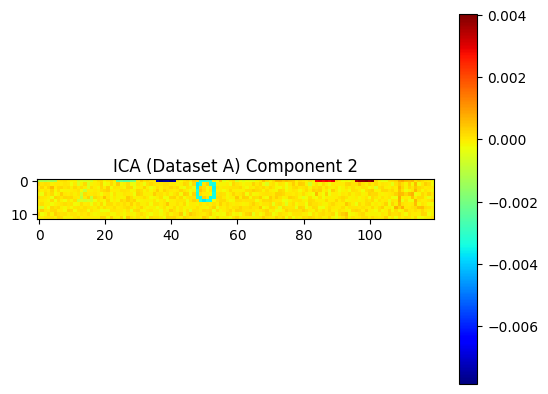

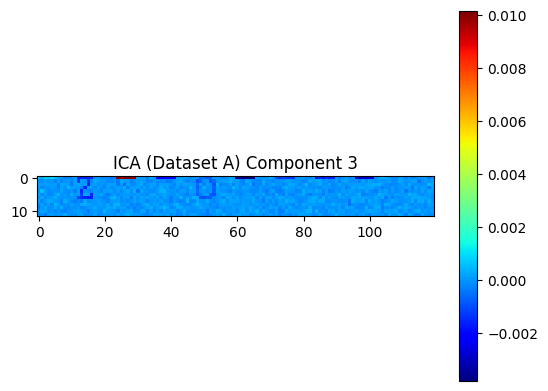

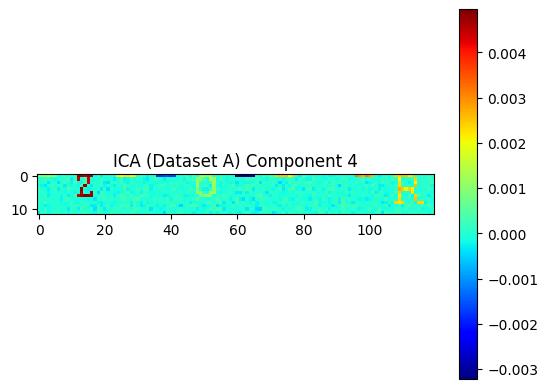

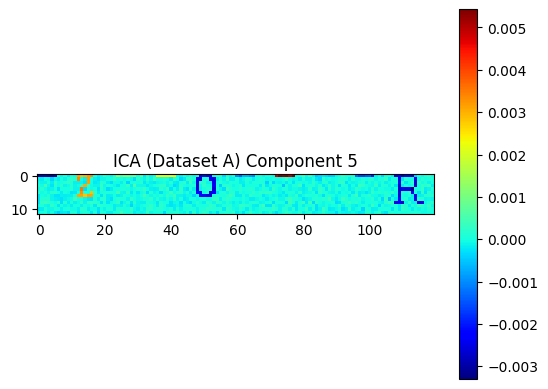

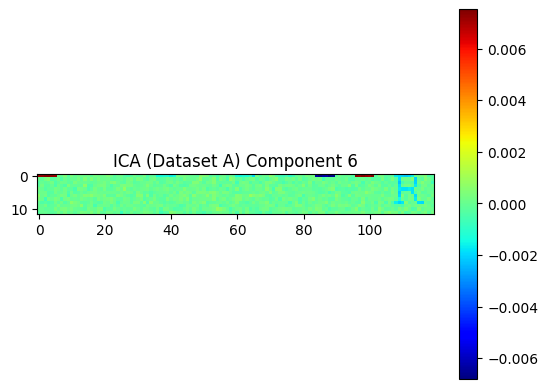

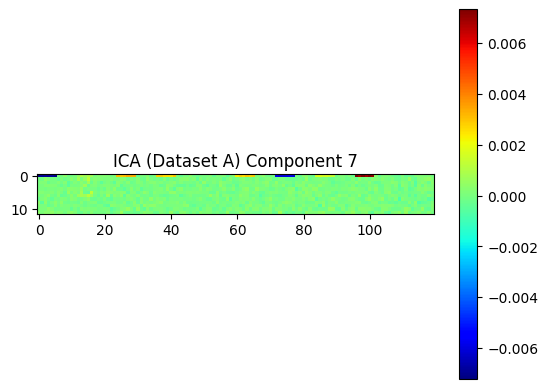

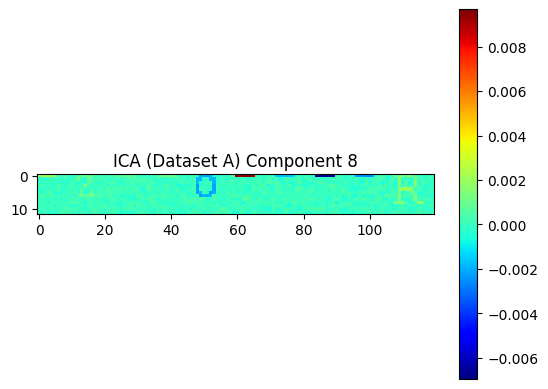

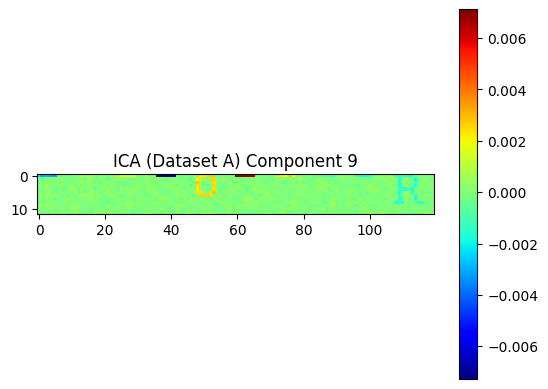

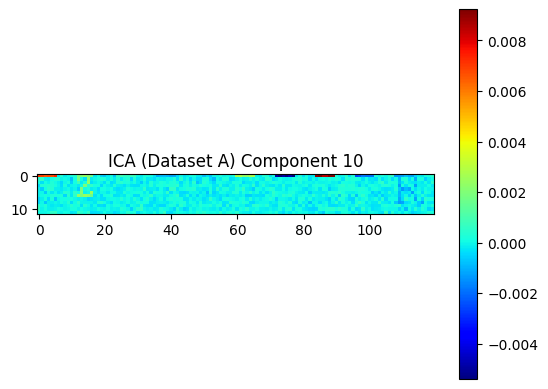

In [3]:
import numpy as np
from tables import open_file
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

# Define the file path
ADDRESS = "/Users/minaghaderi/Downloads/OneDrive_1_1-24-2025/"

# Function to load HDF5 file and extract dataset
def load_hdf5_file(filename):
    file = open_file(ADDRESS + filename, mode="r")
    return file.root.Images.Images  # Assuming structure is consistent

# Function to get image dataset properties
def get_image_properties(image_table):
    sample_image = image_table[0][1]  
    height, width = sample_image.shape
    num_images = len(image_table)
    return height, width, num_images

# Function to flatten images and store in array
def flatten_images(image_table, num_images, height, width):
    flattened_array = np.zeros((num_images, height * width))
    for i in range(num_images):
        flattened_array[i] = image_table[i][1].flatten()
    return flattened_array

# Function to apply PCA
def apply_pca(image_array, components=10):
    pca = PCA(n_components=components)
    transformed_data = pca.fit(image_array)
    return transformed_data

# Function to apply ICA
def apply_ica(image_array, components=10):
    ica = FastICA(n_components=components)
    transformed_data = ica.fit(image_array)
    return transformed_data

# Function to visualize PCA/ICA components
def visualize_components(components, image_shape, title_prefix):
    for i in range(components.shape[0]):
        plt.imshow(components[i].reshape(image_shape), interpolation='nearest', cmap=cm.jet)
        plt.title(f'{title_prefix} Component {i+1}')
        plt.colorbar()
        plt.show()

# Load image datasets
ImagesTableA = load_hdf5_file('A_challenge_for_Mina.hdf5')
ImagesTableB = load_hdf5_file('B_challenge_for_Mina.hdf5')

# Get dataset properties
image_height_A, image_width_A, num_images_A = get_image_properties(ImagesTableA)
image_height_B, image_width_B, num_images_B = get_image_properties(ImagesTableB)

# Flatten images
new_arrayA = flatten_images(ImagesTableA, num_images_A, image_height_A, image_width_A)
new_arrayB = flatten_images(ImagesTableB, num_images_B, image_height_B, image_width_B)

# Apply PCA and ICA
data_PCA = apply_pca(new_arrayB)
data_ICA = apply_ica(new_arrayA)

# Visualize PCA and ICA components
visualize_components(data_PCA.components_, (image_height_B, image_width_B), "PCA (Dataset B)")
visualize_components(data_ICA.components_, (image_height_A, image_width_A), "ICA (Dataset A)")

# Apply ICA on new_arrayB and PCA on new_arrayA

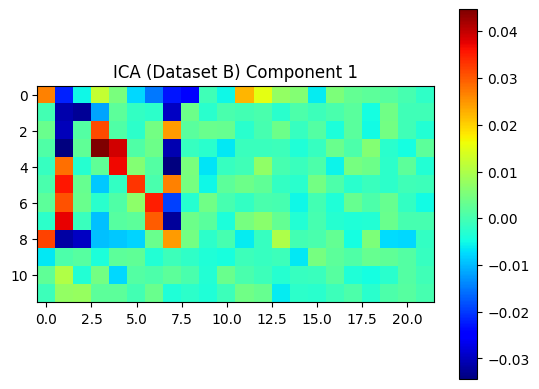

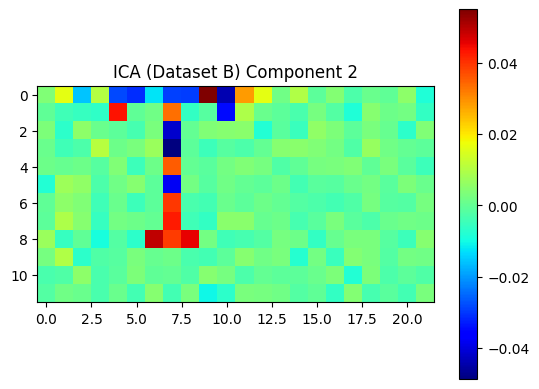

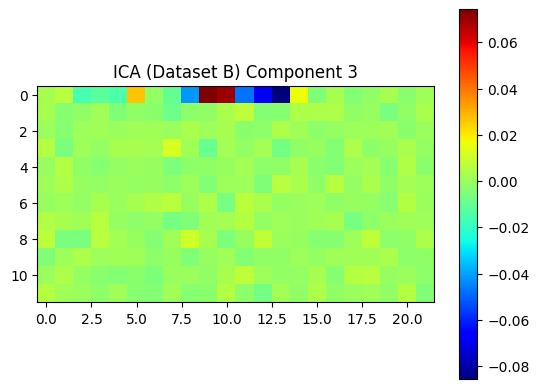

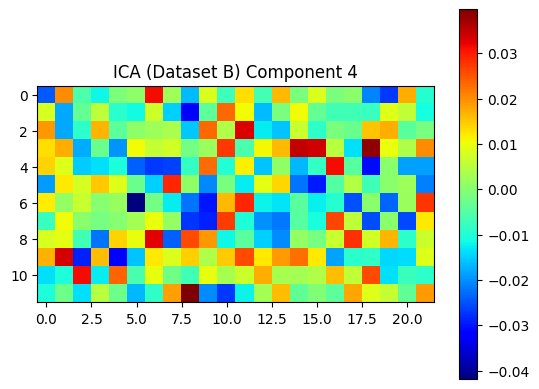

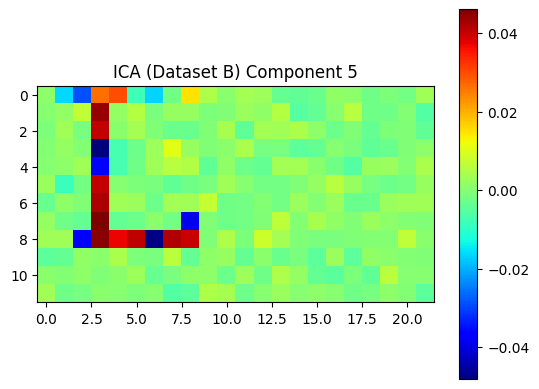

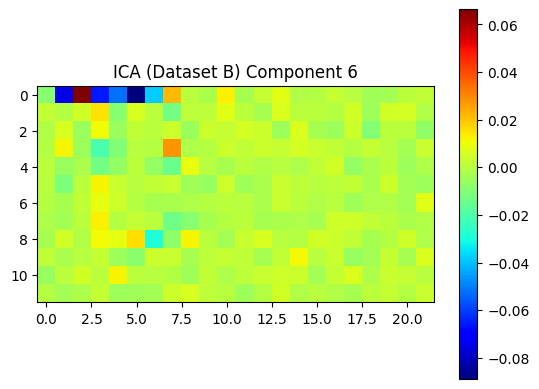

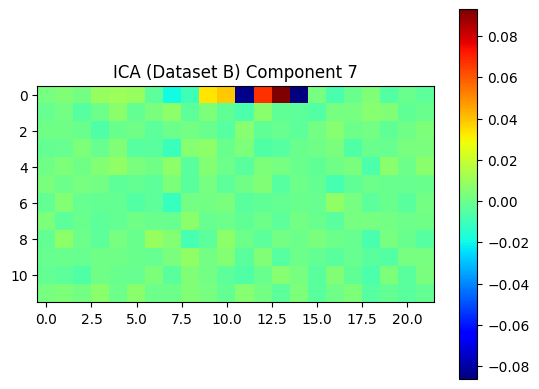

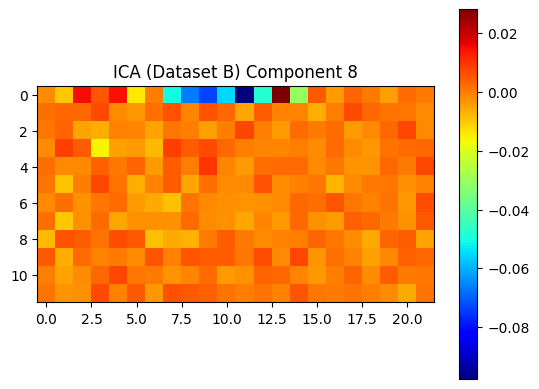

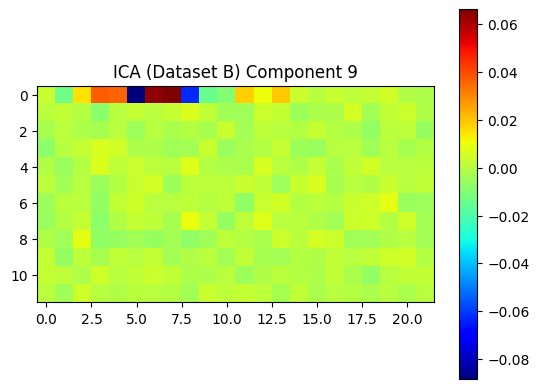

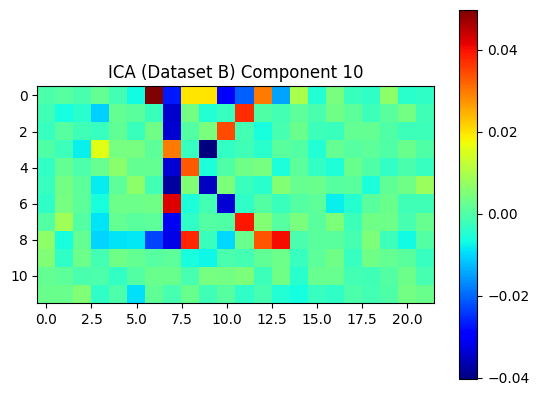

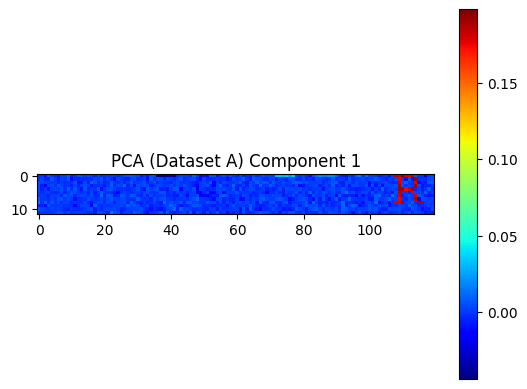

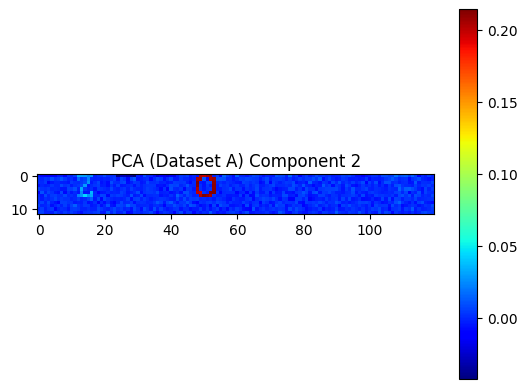

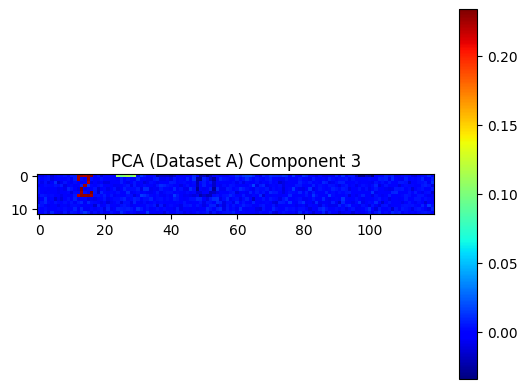

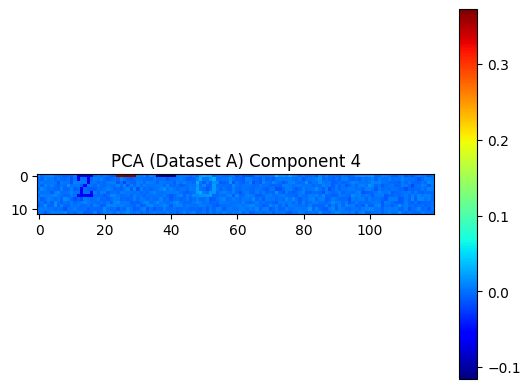

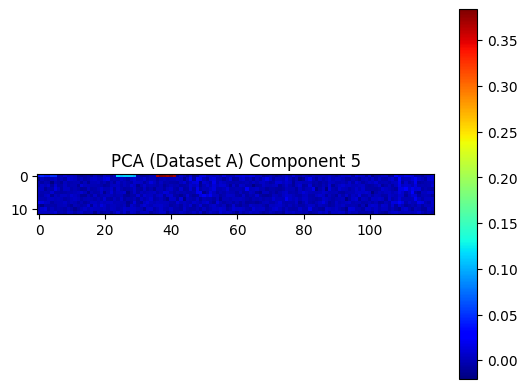

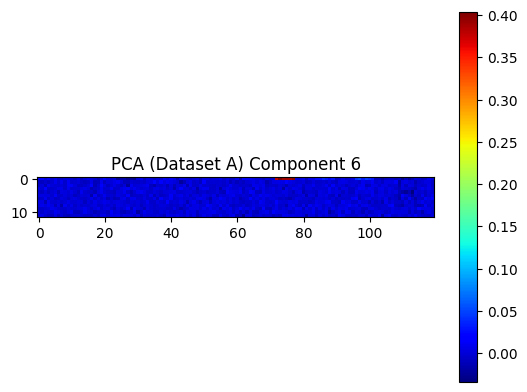

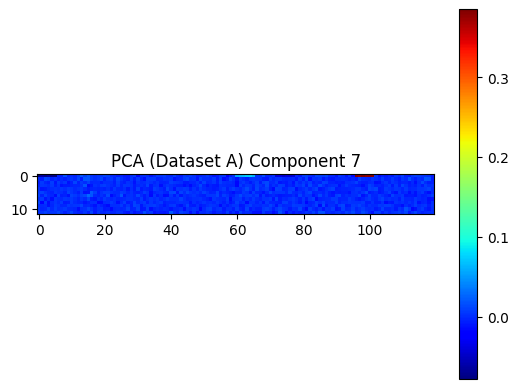

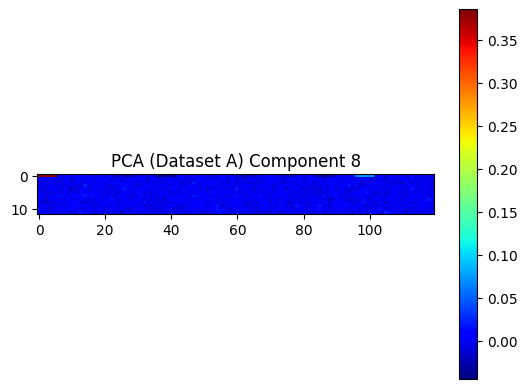

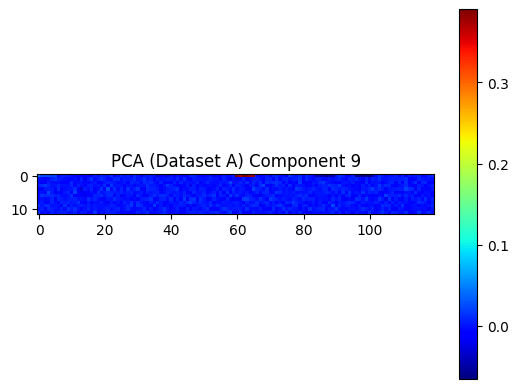

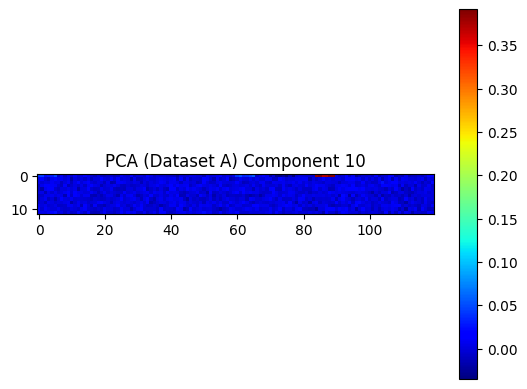

In [5]:
data_ICA = apply_ica(new_arrayB)  
data_PCA = apply_pca(new_arrayA)  

# Visualize ICA and PCA components
visualize_components(data_ICA.components_, (image_height_B, image_width_B), "ICA (Dataset B)")
visualize_components(data_PCA.components_, (image_height_A, image_width_A), "PCA (Dataset A)")


### **ICA Answer: "L", "K", "N", "T"**
- ICA was applied to `new_arrayB`, and after analysis, it revealed **the Python library "NLTK" (Natural Language Toolkit)** as a meaningful structure.    

### **PCA Answer: "R", "O", "Z"**
- PCA was applied to `new_arrayA`, and after analysis, it revealed **Roz, the robot from *The Wild Robot* book** as a meaningful structure.  

